# Natural Language Processing (RNN)

In [ ]:
import keras
keras.__version__

In [ ]:
import numpy as np
import pandas as pd

#from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
import re

data = pd.read_csv('/Users/yiwenshen/Downloads/SAD.csv', skiprows=[8835,535881])
# Keeping only the neccessary columns
data = data[['Sentiment', 'SentimentText']]

In [ ]:
data.shape

In [ ]:
data['Sentiment'].value_counts()

#############added
data1 = data[data.Sentiment == 1][0:500000]
data2 = data[data.Sentiment == 0][0:500000]
data = data1.append(data2)

In [ ]:
data['SentimentText'] = data['SentimentText'].apply(lambda x: x.lower())
data['SentimentText'] = data['SentimentText'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['SentimentText'].values)
X = tokenizer.texts_to_sequences(data['SentimentText'].values)
X = pad_sequences(X)
Y = pd.get_dummies(data['Sentiment']).values

ind = np.arange(X.shape[0])
np.random.shuffle(ind)
X[ind]
Y[ind]
X_train, X_test = X[:800000,:], X[800000:,:]
Y_train, Y_test = Y[:800000,:], Y[800000:,:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [43]:
from keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 640000 samples, validate on 160000 samples
Epoch 1/10
640000/640000 [==============================] - 231s 361us/step - loss: 0.3929 - acc: 0.8245 - val_loss: 1.0940 - val_acc: 0.4051
Epoch 2/10
640000/640000 [==============================] - 235s 368us/step - loss: 0.3707 - acc: 0.8353 - val_loss: 1.1719 - val_acc: 0.4528
Epoch 3/10
640000/640000 [==============================] - 233s 365us/step - loss: 0.3636 - acc: 0.8395 - val_loss: 0.9834 - val_acc: 0.5052
Epoch 4/10
640000/640000 [==============================] - 227s 354us/step - loss: 0.3597 - acc: 0.8420 - val_loss: 1.1358 - val_acc: 0.4629
Epoch 5/10
640000/640000 [==============================] - 228s 356us/step - loss: 0.3569 - acc: 0.8436 - val_loss: 0.8843 - val_acc: 0.4980
Epoch 6/10
640000/640000 [==============================] - 228s 357us/step - loss: 0.3550 - acc: 0.8452 - val_loss: 1.0821 - val_acc: 0.4382
Epoch 7/10
640000/640000 [==============================] - 228s 356us/step - loss: 0.3538 - acc

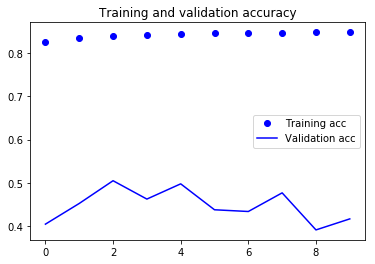

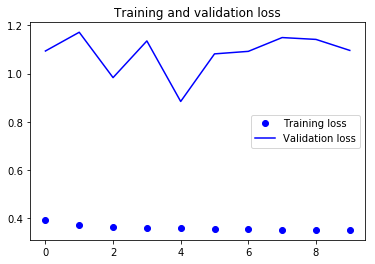

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# model using LSTM layer

In [29]:
embed_dim = 50
lstm_out = 80
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(rate=0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [30]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 64000 samples, validate on 16000 samples
Epoch 1/10
64000/64000 [==============================] - 86s 1ms/step - loss: 0.4166 - acc: 0.8171 - val_loss: 1.3056 - val_acc: 0.2848
Epoch 2/10
64000/64000 [==============================] - 89s 1ms/step - loss: 0.3582 - acc: 0.8461 - val_loss: 1.2916 - val_acc: 0.3339
Epoch 3/10
64000/64000 [==============================] - 85s 1ms/step - loss: 0.3458 - acc: 0.8512 - val_loss: 1.3677 - val_acc: 0.3155
Epoch 4/10
64000/64000 [==============================] - 87s 1ms/step - loss: 0.3374 - acc: 0.8554 - val_loss: 1.4176 - val_acc: 0.3493
Epoch 5/10
64000/64000 [==============================] - 84s 1ms/step - loss: 0.3308 - acc: 0.8573 - val_loss: 1.3649 - val_acc: 0.3564
Epoch 6/10
64000/64000 [==============================] - 84s 1ms/step - loss: 0.3245 - acc: 0.8605 - val_loss: 1.4648 - val_acc: 0.3214
Epoch 7/10
64000/64000 [==============================] - 87s 1ms/step - loss: 0.3188 - acc: 0.8632 - val_loss: 1.4410 - val_acc

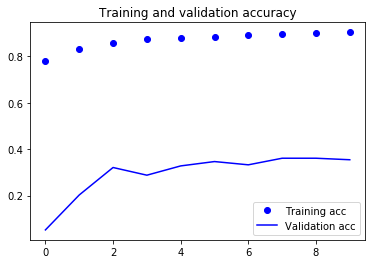

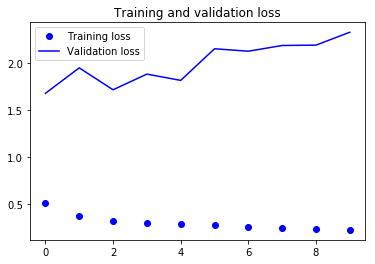

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()